In [1]:
import numpy as np 
import pandas as pd

In [10]:
import os
for dirname, _, filenames in os.walk('/content/games-release-ALL.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df_steam = pd.read_csv('/content/games-release-ALL.csv')
df_steam

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%
...,...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,/app/1690/,Oct 16 2006,137,290,120,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,/app/1670/,Jul 26 2006,15,173,104,104,60.17%
66424,66424,Gumboy: Crazy Adventures,/app/2520/,Dec 19 2006,22,61,60,60,50.32%
66425,66425,Shattered Union,/app/3960/,Oct 25 2006,13,71,70,70,50.27%


In [4]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [12]:
df_steam.head()
df_steam = df_steam.replace(',','',regex = True)
features = ['peak_players','positive_reviews','negative_reviews']
df_steam[features] = df_steam[features].astype(int)

In [13]:
df_steam = df_steam.drop(['link','total_reviews'],axis = 1)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_top100 = df_steam.sort_values('positive_reviews', ascending = False).reset_index().head(100)
df_top100

,index,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,60557,60557,Higurashi When They Cry Hou - Ch.2 Watanagashi,/app/410890/,Nov 13 2015,163,999,35,35,90.85%
1,17618,17618,Siege Survival: Gloria Victis,/app/1167140/,May 18 2021,"1,361",999,246,246,76.70%
2,15497,15497,Rail Route,/app/1124180/,Jun 23 2021,461,998,64,64,88.58%
3,15279,15279,Jerma's Big Adventure,/app/1722570/,Aug 27 2021,42,998,16,16,92.40%
4,35826,35826,Zup! XS,/app/673800/,Apr 17 2019,306,998,158,158,81.99%
...,...,...,...,...,...,...,...,...,...,...
95,65791,65791,Flight of the Icarus,/app/49800/,May 12 2010,42,99,153,153,41.31%
96,18815,18815,Pnevmo-Capsula: Domiki,/app/1614380/,Oct 4 2021,5,99,26,26,72.39%
97,23982,23982,R.B.I. Baseball 21,/app/1462150/,Mar 16 2021,56,99,83,83,53.48%
98,57334,57334,Ember Kaboom,/app/451000/,Jun 3 2016,15,99,19,19,75.86%


In [8]:
df_top100_peak = df_steam.sort_values('peak_players', ascending = False).reset_index().head(100)
df_top100_peak

,index,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,56869,56869,Zombie Party,/app/384500/,Jun 10 2016,999,560,93,93,80.68%
1,31704,31704,COCKHEAD,/app/1172050/,Sep 27 2020,999,490,274,274,62.22%
2,5261,5261,Asphalt 9: Legends,/app/1815780/,Aug 2 2022,999,"3,351",761,761,78.92%
3,35235,35235,AI: The Somnium Files,/app/948740/,Sep 18 2019,998,"5,864",508,508,89.02%
4,46775,46775,Last Tide,/app/858590/,Aug 27 2018,998,731,423,423,61.75%
...,...,...,...,...,...,...,...,...,...,...
95,42936,42936,Dead,/app/527150/,Apr 6 2018,987,183,15,15,83.80%
96,18687,18687,Actraiser Renaissance,/app/1393370/,Sep 23 2021,987,407,122,122,72.86%
97,64213,64213,Victim of Xen,/app/300220/,May 21 2014,986,268,170,170,59.40%
98,62980,62980,Streets of Chaos,/app/346320/,Jan 29 2015,986,31,59,59,38.45%


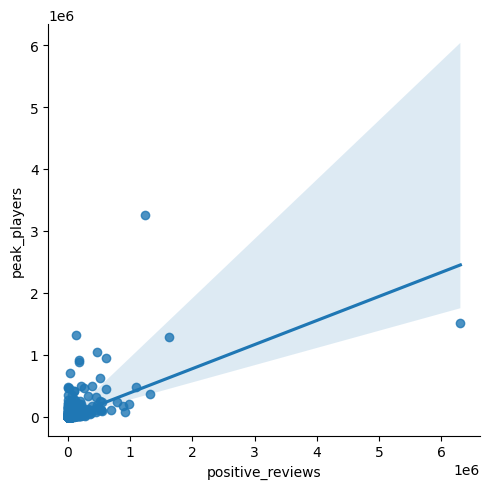

In [14]:
sns.lmplot(x='positive_reviews', y = 'peak_players',data= df_steam)

In [15]:
df_top100_rating = df_steam.sort_values('rating', ascending = False).reset_index().head(100)
df_top100_rating

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,35050,35050,People Playground,Jul 23 2019,15026,175076,2086,97.54%
1,3295,3295,Vampire Survivors,Oct 20 2022,77061,188186,2341,97.52%
2,25952,25952,Hades,Sep 17 2020,37749,219790,3274,97.34%
3,56243,56243,Stardew Valley,Feb 26 2016,94879,547823,9918,97.32%
4,66262,66262,Portal,Oct 10 2007,20672,126704,1934,97.09%
...,...,...,...,...,...,...,...,...
95,5,5,东北之夏,Jan 9 2023,8672,8891,165,95.08%
96,56249,56249,Don't Starve Together,Apr 21 2016,68418,369233,15241,95.08%
97,63136,63136,Grimm,Jan 6 2014,30886,30906,911,95.06%
98,15209,15209,文字遊戲：第零章,Jan 14 2021,412,4357,46,95.04%


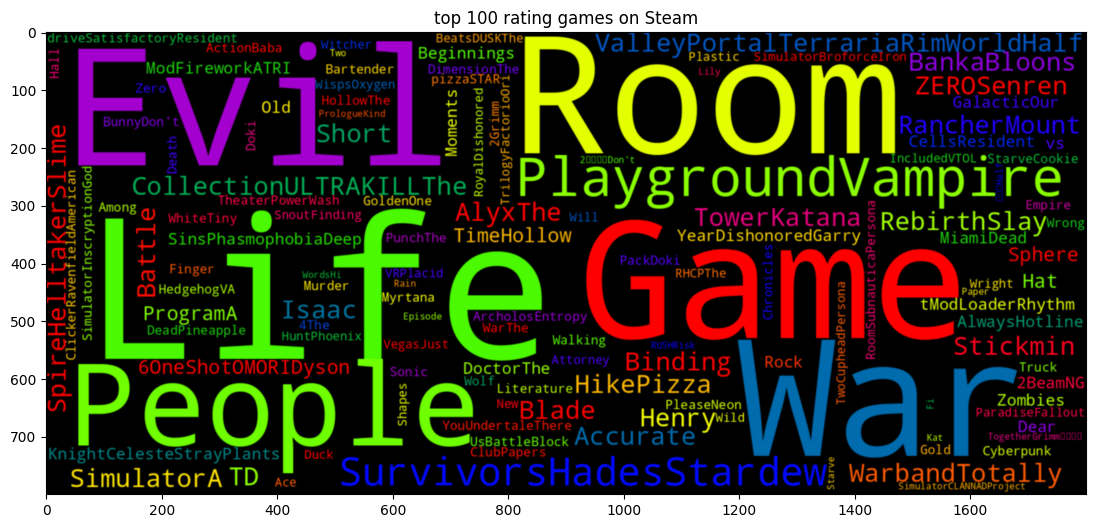

In [16]:
from wordcloud import WordCloud, STOPWORDS
text = ''.join(df_top100_rating['game'])
word_cloud = WordCloud(width = 1800, height = 800, colormap = 'prism', background_color = 'black').generate(text)
plt.figure(figsize = (25,6))
plt.title('top 100 rating games on Steam')
plt.imshow(word_cloud,interpolation = 'bicubic')
plt.show()

In [17]:
df_steam['release'] = pd.to_datetime(df_steam['release'],format = '%b %d %Y')
df_steam['release'] = df_steam['release'].dt.year

In [18]:
df_steam

,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,0,Pizza Tower,2023,4529,19807,227,96.39%
1,1,Resident Evil 4,2023,168191,61752,1616,95.75%
2,2,The Murder of Sonic the Hedgehog,2023,15543,12643,213,95.54%
3,3,Pineapple on pizza,2023,1415,11717,209,95.39%
4,4,Hi-Fi RUSH,2023,6132,14152,324,95.09%
...,...,...,...,...,...,...,...
66422,66422,Space Empires V,2006,137,290,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,2006,15,173,104,60.17%
66424,66424,Gumboy: Crazy Adventures,2006,22,61,60,50.32%
66425,66425,Shattered Union,2006,13,71,70,50.27%


In [19]:
release = pd.pivot_table(df_steam, index = 'release', values ='game', aggfunc = len).reset_index()
release

,release,game
0,2006,62
1,2007,103
2,2008,180
3,2009,277
4,2010,222
5,2011,244
6,2012,246
7,2013,373
8,2014,1588
9,2015,2630


<Axes: xlabel='release', ylabel='game'>

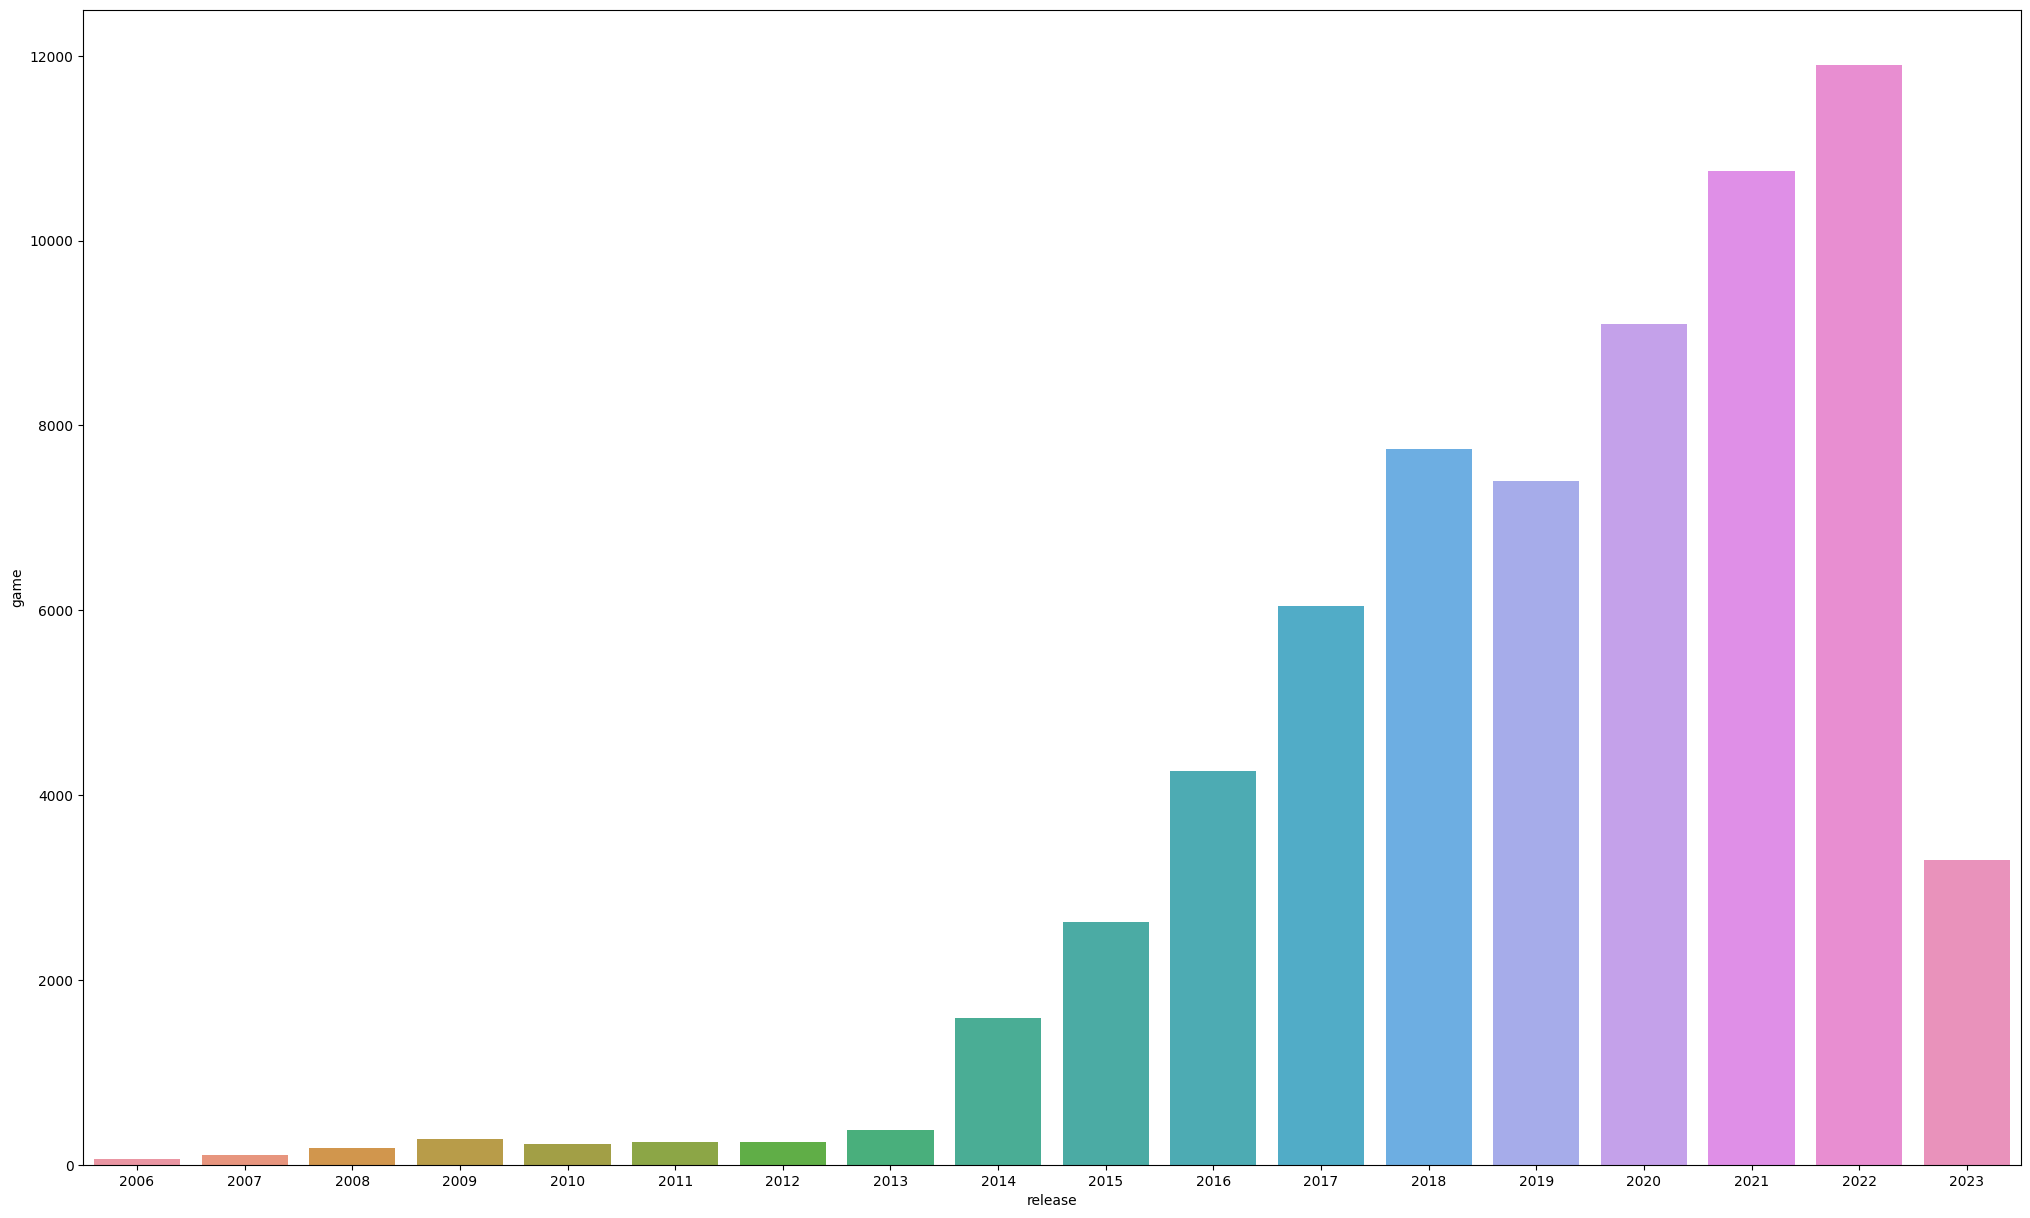

In [20]:
plt.figure(figsize = (25,15))
sns.barplot(x = release['release'], y = release['game'])